# Delays between case, recovery, and death reports during COVID-19 from different perspectives
## Marco Arieli Herrera-Valdez$^1$, Carlos Ignacio Herrera-Nolasco$^1$, 
## Alejandro Joel Herrera-McKiernan$^2$, Emilio Arieli Herrera-McKiernan$^3$, 
## Eugenia O'Reilly-Regueiro$^4$,


#### $^1$ Departamento de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México
#### $^2$ Escuela Primaria República de Guatemala, Secretaría de Educación Pública, México
#### $^3$ Escuela Secundaria Vicente Guerrero, Secretaría de Educación Pública, México
#### $^4$ Instituto de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México

Last modified: MAHV, 20200507



### Data sources

The data was downloaded from the repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) (https://github.com/CSSEGISandData/COVID-19). All calculations were performed using Python version 3.82 (https://www.python.org/) and the modules numpy (https://numpy.org/), matplotlib (https://matplotlib.org/), and pandas (https://pandas.pydata.org/). A JuPyTeR notebook with the analysis and calculations performed here can be found at (https://scab-unam.github.io/dam_COVID-19/).


In [1]:
from dateutil.parser import parse
import sys
sys.path.insert(1, '../')
from dam_COVID19_baseCode import *
import matplotlib.pylab as gr
small={'family' : 'normal','weight' : 'normal','size'   : 8}
medium={'family' : 'normal','weight' : 'normal','size'   : 10}
large={'family' : 'normal','weight' : 'bold','size'   : 13}
gr.rc('font', size=small['size'], weight='normal')          # controls default text sizes
gr.rc('axes', titlesize=medium['size'])     # fontsize of the axes title
gr.rc('axes', labelsize=medium['size'])    # fontsize of the x and y labels
gr.rc('xtick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('ytick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('legend', fontsize=small['size'])    # legend fontsize
gr.rc('figure', titlesize=large['size'])  # fontsize of the figure title
%matplotlib inline 


In [2]:
def openCSV_DB(path,comp='zip',enc='latin-1'):
    data=pd.read_csv(path, compression=comp,encoding=enc)
    print('Data obtained from %s'%path)
    return data

sitio='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
archCasos='time_series_covid19_confirmed_global.csv'
archFatal='time_series_covid19_deaths_global.csv'
archRecov='time_series_covid19_recovered_global.csv'

compr=None; codif='latin-1'
cases = openCSV_DB(sitio+archCasos,compr,codif)
recovs= openCSV_DB(enc=codif,path=sitio+archRecov,comp=compr)
deaths= openCSV_DB(path=sitio+archFatal,comp=compr)
#
locs_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/locations.csv'
locs= openCSV_DB(path= locs_url, comp=None)

Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Data obtained from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/locations.csv


In [108]:
cases.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,112,112,119,119,119,119,122,122,122,124
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,949063,965609,979119,989680,1002662,1018999,1037325,1053650,1069368,1081336
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,59995,61460,63000,64694,65460,66694,68530,70836,73310,75523
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,114,114,114,114
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,4326,4333,4338,4342,4347,4357,4363,4370,4375,4382


In [110]:
cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02
mean,20.961559,23.343773,2.078652,2.449438,3.524345,5.370787,7.932584,10.962547,20.891386,23.097378,...,1.457596e+05,1.473001e+05,1.485799e+05,1.496466e+05,1.512941e+05,1.527469e+05,1.544089e+05,1.561636e+05,1.580608e+05,1.595991e+05
std,24.928747,70.561551,27.228175,27.326766,34.019598,47.346836,66.166252,89.148259,218.779113,220.114337,...,7.481833e+05,7.543880e+05,7.597930e+05,7.639973e+05,7.693751e+05,7.747684e+05,7.804428e+05,7.864899e+05,7.931238e+05,7.992938e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.519578,-15.245250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.190000e+02,5.310000e+02,5.330000e+02,5.330000e+02,5.355000e+02,5.370000e+02,5.410000e+02,5.430000e+02,5.430000e+02,5.440000e+02
50%,22.300000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.068000e+03,5.113000e+03,5.123000e+03,5.130000e+03,5.134000e+03,5.156000e+03,5.161000e+03,5.161000e+03,5.284000e+03,5.359000e+03
75%,41.133100,79.867338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.692450e+04,4.763600e+04,4.826150e+04,4.937600e+04,5.047100e+04,5.158100e+04,5.252350e+04,5.331300e+04,5.443300e+04,5.551200e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,7.979709e+06,8.048865e+06,8.106384e+06,8.154594e+06,8.212981e+06,8.273296e+06,8.336031e+06,8.407702e+06,8.491459e+06,8.575177e+06


In [3]:
cc='China';cases[cases['Country/Region'].isin([cc,])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,937,937,937,937,938,938,938,938,940,940
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,586,586,586,586,587,587,587,589,589,589
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,417,417,417,417,418,419,420,427,429,429
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,170,170,170,170,170,170,170,170,170,170
61,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1875,1877,1881,1884,1889,1892,1895,1895,1904,1907
62,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,260,260,260,260,260,260,260,260,260,260
63,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
64,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,171,171,171,171,171,171,171,171,171,171
65,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,368,368,368,368,368,368,368,368,368,368


In [4]:
locs.tail(5)

,countriesAndTerritories,location,continent,population_year,population
207,Wallis_and_Futuna,Wallis and Futuna,Oceania,2020.0,11246.0
208,Western_Sahara,Western Sahara,Africa,2020.0,597330.0
209,Yemen,Yemen,Asia,2020.0,29825968.0
210,Zambia,Zambia,Africa,2020.0,18383956.0
211,Zimbabwe,Zimbabwe,Africa,2020.0,14862927.0


In [109]:
# ------------------------------
# Description of the data so that the headers and the columns
# without case data are distinguished
# ------------------------------
nRows,nCols=cases.shape
cases.head(10)
nHeaderRows=1;
#
nHeaderCols=3
# how to generate date lists from a baseline using the datetime
dates = cases.columns[4:]
nDays = len(dates)
days=np.arange(nDays)
print('Got data from %d days between %s and %s'%(nDays,dates[0],dates[-1]))
lastDay=parse(dates[-1])
print(lastDay.date())

Got data from 277 days between 1/22/20 and 10/24/20
2020-10-24


In [8]:
# -------------------
print("""Separating data by taking whole country cases into account""")
# -------------------
npCases = cases.to_numpy()
countries = np.unique(npCases[:,1])
nCountries = len(countries)
print('Considering data from {d} countries'.format(d=nCountries))
print(countries)

Separating data by taking whole country cases into account
Considering data from 189 countries
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary

Get a dictionary with data from each country

In [9]:
cc='United Kingdom'
iC = cases['Country/Region'].isin([cc]); print(iC[iC==True])
cases[cases['Country/Region'].isin([cc,])]

247    True
248    True
249    True
250    True
251    True
252    True
253    True
254    True
255    True
256    True
257    True
Name: Country/Region, dtype: bool


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
247,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
248,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,185,185,185,185,185,188,188,188,190,190
249,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,71,71,71,71,71,71,71,71,71,71
250,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,225,233,233,233,235,235,235,236,239,239
251,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,748,748,748,748,767,768,775,784,795,795
252,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
253,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,531,544,558,571,577,608,621,630,641,660
254,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,348,348,348,348,348,348,348,348,348,348
255,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
256,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,696,697,698,698,698,698,698,698,699,701


In [10]:
cc='Sweden'
iC = recovs['Country/Region'].isin([cc]); print(iC[iC==True])
recovs[recovs['Country/Region'].isin([cc,])]

218    True
Name: Country/Region, dtype: bool


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
218,NaN,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
def diff(a):
    da = np.zeros(len(a))
    da[1:]= a[1:]-a[:-1]
    return da

def countryCases(countries, casesDF,recovDF,deathDF,locs):
    dd=dict()
    npCases = casesDF.to_numpy()
    npRecov = recovDF.to_numpy()
    npDeath = deathDF.to_numpy()
    countries = np.unique(npCases[:,1])
    nCountries = len(countries)
    dd['dates']= casesDF.columns[4:]
    for cc in countries:
        #print(cc)
        dd[cc] = dict()
        ii = locs['location'].isin([cc,])
        ps= locs[ii]['population'].to_numpy()
        dd[cc]['popSize'] =ps
        iC = cases['Country/Region'].isin([cc])
        dd[cc]['cCases']= cases[iC].iloc[:,4:].to_numpy().sum(0)
        iR = recovs['Country/Region'].isin([cc])
        dd[cc]['cRecov']= recovs[iR].iloc[:,4:].to_numpy().sum(0)
        iD = deaths['Country/Region'].isin([cc])
        dd[cc]['cDeath']= deaths[iD].iloc[:,4:].to_numpy().sum(0)
        nPts =len(dd[cc]['cCases'])
        #
        dd[cc]['pCases']= diff(dd[cc]['cCases'])
        # dd[cc]['pCases']= dd[cc]['cCases'] - dd[cc]['cRecov'] - dd[cc]['cDeath']
        dd[cc]['newRecov']= diff(dd[cc]['cRecov'])
        dd[cc]['newDeath']= diff(dd[cc]['cDeath'])
        dd[cc]['newRemovals'] = dd[cc]['newRecov']+dd[cc]['newDeath']
        dd[cc]['newCases'] = diff(dd[cc]['pCases']) + dd[cc]['newRemovals']
        dd[cc]['cCaseRemovalRatio'] = dd[cc]['newRemovals'] / dd[cc]['pCases']
        dd[cc]['recovRemovalRatio'] = dd[cc]['newRecov'] / dd[cc]['newRemovals']
        dd[cc]['deathRemovalRatio'] = dd[cc]['newDeath'] / dd[cc]['newRemovals']
        #dd[cc]['rateDeath'] = np.zeros(nPts); dd[cc]['rateRecov'] = np.zeros(nPts)
        #dd[cc]['timeDeath'] = np.zeros(nPts); dd[cc]['timeRecov'] = np.zeros(nPts)
        #ii = np.where(dd[cc]['pCases']>0)[0]
        #dd[cc]['rateDeath'][ii] = dd[cc]['newDeath'][ii]/dd[cc]['pCases'][ii]
        #dd[cc]['rateRecov'][ii] = dd[cc]['newRecov'][ii]/dd[cc]['pCases'][ii]
        #dd[cc]['timeDeath'][ii] = dd[cc]['pCases'][ii]/dd[cc]['newDeath'][ii]
        #dd[cc]['timeRecov'][ii] = dd[cc]['pCases'][ii]/dd[cc]['newRecov'][ii]
        jj = np.where(dd[cc]['newRecov']+dd[cc]['newDeath'] >0)[0]   
        dd[cc]['R(t)'] = np.zeros(nPts)
        dd[cc]['R(t)'][ii] = dd[cc]['newCases'][ii]/ (dd[cc]['newRecov'][ii]+dd[cc]['newDeath'][ii])
    return dd


In [160]:
data= countryCases(countries, cases, recovs, deaths,locs)


<ipython-input-159-f6c2ecde5b01>:34: RuntimeWarning: divide by zero encountered in true_divide
  dd[cc]['cCaseRemovalRatio'] = dd[cc]['newRemovals'] / dd[cc]['pCases']
<ipython-input-159-f6c2ecde5b01>:34: RuntimeWarning: invalid value encountered in true_divide
  dd[cc]['cCaseRemovalRatio'] = dd[cc]['newRemovals'] / dd[cc]['pCases']
<ipython-input-159-f6c2ecde5b01>:35: RuntimeWarning: invalid value encountered in true_divide
  dd[cc]['recovRemovalRatio'] = dd[cc]['newRecov'] / dd[cc]['newRemovals']
<ipython-input-159-f6c2ecde5b01>:36: RuntimeWarning: invalid value encountered in true_divide
  dd[cc]['deathRemovalRatio'] = dd[cc]['newDeath'] / dd[cc]['newRemovals']
<ipython-input-159-f6c2ecde5b01>:42: RuntimeWarning: divide by zero encountered in true_divide
  dd[cc]['timeDeath'][ii] = dd[cc]['pCases'][ii]/dd[cc]['newDeath'][ii]
<ipython-input-159-f6c2ecde5b01>:43: RuntimeWarning: divide by zero encountered in true_divide
  dd[cc]['timeRecov'][ii] = dd[cc]['pCases'][ii]/dd[cc]['newRecov

In [157]:
print('Keys for the global data dictionary: %s'%data['China'].keys())
cc = 'Germany'
print('Calculations for %s'%cc)
print('cRecov',data[cc]['cRecov'])
print('Recov times',data[cc]['timeRecov'])
print('Death times',data[cc]['timeDeath'])


Keys for the global data dictionary: dict_keys(['popSize', 'cCases', 'cRecov', 'cDeath', 'pCases', 'newRecov', 'newDeath', 'newCases', 'newRemovals', 'cCaseRemovalRatio', 'recovRemovalRatio', 'deathRemovalRatio', 'rateDeath', 'rateRecov', 'timeDeath', 'timeRecov', 'R(t)'])
Calculations for Germany
cRecov [     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      1      1      1      1      1     12     12     12
     14     14     14     14     14     15     16     16     16     16
     16     16     16     16     17     18     18     18     18     25
     25     46     46     46     67     67    105    113    180    233
    266    266   3243   3547   5673   6658   8481   9211  13500  16100
  18700  22440  24575  26400  28700  28700  36081  46300  52407  53913
  57400  60300  64300  68200  72600  77000  83114  85400  88000  91500
  95200  99400 103300 109800 109800 112000 114500 11740

### Delays between first case and first recovery or first death reports

In [143]:
def findFirst(condition,defaultValue=None):
    i = np.where(condition)
    #print('len i',len(i[0]))
    if len(i[0])<1:
        j=defaultValue
    else: 
        j=i[0].min()
    return j

def firstCRDs(data):
    i1stC=list(); i1stD=list(); i1stR=list() 
    dfV=-1
    for nn in range(nCountries):
        cName=countries[nn]
        i1stC.append(findFirst(data[cName]['cCases']>0,defaultValue=dfV))
        i1stR.append(findFirst(data[cName]['cRecov']>0,defaultValue=dfV))
        i1stD.append(findFirst(data[cName]['cDeath']>0,defaultValue=dfV))
    return np.array(i1stC),np.array(i1stR),np.array(i1stD)

def checkedDelay(A,B):
    nPts = np.minimum(len(A),len(B))
    d=list()
    for n in range(nPts):
        if type(A[n])==type(B[n]):
            d.append(A[n]-B[n])
    return d

#### Sorting the first case, first recovery, and first death reports for quantification

In [144]:
# Indices of the first cases, recoveries, and deaths (these correspond to dates from d0), for each country
i1stC,i1stR,i1stD=firstCRDs(data)
# Sorting in ascending order for the occurrence of the first case reports. These indices correspond to countries, sorted by their date of first case report.
isort_i1stC = i1stC.argsort() 
# Sorting of the first report date by country using the sorted indices for the first cases 
si1stC= i1stC[isort_i1stC] 
si1stR= i1stR[isort_i1stC]
si1stD= i1stD[isort_i1stC]
# Difference between the indices for first recoveries and deaths relative to the first case reports (these correspond to days between first case report and first recovery or first death reports in each country)
delaysDC= i1stD-i1stC
# Delays by country sorted with respect to the first case reports
#sDelaysRC = delaysRC[isort_i1stC]
sDelaysDC = delaysDC[isort_i1stC]
# Countries listed 
s1stC_countries = countries[isort_i1stC] 

## Delays relative to the first case report in different countries

To get an idea of the initial the dynamics of the pandemic, we calculated the delays to the first case reports and compare to the first deaths reported by country. 

#### Table to see countries by their first case report dates relative to $d_0$ and the delays to the first recovery or first death report

In [145]:
# As many as countries
print('Country & First case & first recovery & first death \\\\')
print('\hline ')
fn= 'COVID19_worldFirstReports.tex'
file1 = open(fn,"w+")
for mm in range(nCountries):
    if ((si1stR[mm]>=0) & (si1stD[mm]>=0)):
        sss = [s1stC_countries[mm], dates[si1stC[mm]], si1stC[mm], dates[si1stR[mm]], si1stR[mm]-si1stC[mm], dates[si1stD[mm]], si1stD[mm]-si1stC[mm]]
        str0='{s[0]} & {s[1]} ({s[2]})  & {s[3]} ({s[4]})  & {s[5]} ({s[6]}) \\\\'.format(s=sss)
    elif ((si1stR[mm]<0)&(si1stD[mm]>=0)):
        sss = [s1stC_countries[mm], dates[si1stC[mm]], si1stC[mm], dates[si1stD[mm]], si1stD[mm]-si1stC[mm]]
        str0='{s[0]} & {s[1]} ({s[2]})  & -- (--)  & {s[3]} ({s[4]}) \\\\'.format(s=sss)
    elif (si1stD[mm]<0&(si1stR[mm]>=0)):
        sss = [s1stC_countries[mm], dates[si1stC[mm]], si1stC[mm], dates[si1stR[mm]], si1stR[mm]-si1stC[mm]]
        str0='{s[0]} & {s[1]} ({s[2]})  & {s[3]} ({s[4]})  & -- (--) \\\\'.format(s=sss)
    else:
        sss = [s1stC_countries[mm], dates[si1stC[mm]], si1stC[mm]]
        str0='{s[0]} & {s[1]} ({s[2]})  & -- (--)  & -- (--) \\\\'.format(s=sss)
    file1.write(str0); print(str0)
    
    if (mm<nCountries-1):
        if (si1stC[mm]<si1stC[mm+1]):
            file1.write('\hline'); print('\hline ')
file1.close()

Country & First case & first recovery & first death \\
\hline 
Taiwan* & 1/22/20 (0)  & 2/6/20 (15)  & 2/16/20 (25) \\
Thailand & 1/22/20 (0)  & 1/26/20 (4)  & 3/1/20 (39) \\
Korea, South & 1/22/20 (0)  & 2/7/20 (16)  & 2/20/20 (29) \\
US & 1/22/20 (0)  & 2/9/20 (18)  & 2/29/20 (38) \\
China & 1/22/20 (0)  & 1/22/20 (0)  & 1/22/20 (0) \\
Japan & 1/22/20 (0)  & 1/26/20 (4)  & 2/13/20 (22) \\
\hline 
Vietnam & 1/23/20 (1)  & 2/1/20 (9)  & 7/31/20 (190) \\
Singapore & 1/23/20 (1)  & 2/8/20 (16)  & 3/21/20 (58) \\
\hline 
France & 1/24/20 (2)  & 2/12/20 (19)  & 2/15/20 (22) \\
\hline 
Malaysia & 1/25/20 (3)  & 2/7/20 (13)  & 3/17/20 (52) \\
Nepal & 1/25/20 (3)  & 2/12/20 (18)  & 5/16/20 (112) \\
\hline 
Canada & 1/26/20 (4)  & 2/12/20 (17)  & 3/9/20 (43) \\
Australia & 1/26/20 (4)  & 1/30/20 (4)  & 3/1/20 (35) \\
\hline 
Sri Lanka & 1/27/20 (5)  & 2/8/20 (12)  & 3/28/20 (61) \\
Germany & 1/27/20 (5)  & 2/13/20 (17)  & 3/9/20 (42) \\
Cambodia & 1/27/20 (5)  & 2/12/20 (16)  & -- (--) \\
\hli

In [146]:
print('Days of first cases',i1stC)
print('Indices indices of the first cases sorted by date\n',isort_i1stC)

Days of first cases [ 33  47  34  40  58  51  41  39   4  34  39  54  33  46  55  37  13  61
  54  44  49  43  68  35  47  46  48  65  69  58   5  44   4  53  57  32
   0  44  99  53  49  44  49  34  50  47  39  36  16  56  60  39  39  23
  57  53  59  36  52  51  57   7   2  52  55  35   5  52  35  60  52  51
  63  50  58  44  49  42  37   8  40  28  33  38  30   9  49   0  41  51
  51   0  52  33  56  62  40  30 112  54  62  42  37  38  66  58  71   3
  46  63  45  52  56  37  46  38  48  55  40  60  52   3  36  37  57  58
  37  35  35  33  34  48  58  46  44   8  42  40  38  35   9  52  63  52
  52  36  75  40  40  44  52  69   1  44  43 264  54  43  74  10   5  51
  52  10  34  60   0  99  54   0  60  44  52  42  49   0  59  41   7   9
  51  53  52   1  43  74  79  56  58]
Indices indices of the first cases sorted by date
 [166 169  91 175  36  87 183 152  62 107 121  32   8 160  66  30 178  61
  79 135  85 140 179 163 159  16  48  53  81  84  97  35  93  82   0 129
  12   2   9  4

In [147]:
print('Days of first death reports (not sorted)\n',i1stD)
print('Latest first recovery reported on day %d'%i1stR.max())
print('Latest first death reported on day %d'%i1stD.max())

Days of first death reports (not sorted)
 [ 60  49  50  60  67  76  46  64  39  50  51  70  54  56  74  69  49  75
  75  -1  67  59  69  55  66  49  56  69  82  62  -1  63  47 122  97  60
   0  60 105  71  59  57  67  57  56  60  60  52  29  79  -1  55  52  46
  69  91  -1  63  85  74 191  59  24  58  61  73  47  59  49  -1  54  84
  95  50  74  -1  64  53  53  49  49  28  42  49  59  30  57  22  65  58
  64  29  61  73  72  -1  72  48 169  73  71  73  59  52  70 116  76  55
  98  67  77  68  59  57  56  67  -1  61  48 124 170 115  44  67  65  63
  61  60  52  69  56  49 180  59  58  11  50  55  66  60  57 129  -1  -1
  -1  41 100  62  70  58  -1  92  59  56  52  -1  77  65 114  41  66  51
  72  48  43  67  25 101  69  39  -1  65  63  57  55  38 184  51  58  44
  66  65  65 191  64 125  99  71  61]
Latest first recovery reported on day 274
Latest first death reported on day 191


In [148]:
print('Delays between first case and first death reports in each country (not sorted)\n',delaysDC)

Delays between first case and first death reports in each country (not sorted)
 [  27    2   16   20    9   25    5   25   35   16   12   16   21   10
   19   32   36   14   21  -45   18   16    1   20   19    3    8    4
   13    4   -6   19   43   69   40   28    0   16    6   18   10   13
   18   23    6   13   21   16   13   23  -61   16   13   23   12   38
  -60   27   33   23  134   52   22    6    6   38   42    7   14  -61
    2   33   32    0   16  -45   15   11   16   41    9    0    9   11
   29   21    8   22   24    7   13   29    9   40   16  -63   32   18
   57   19    9   31   22   14    4   58    5   52   52    4   32   16
    3   20   10   29  -49    6    8   64  118  112    8   30    8    5
   24   25   17   36   22    1  122   13   14    3    8   15   28   25
   48   77  -64  -53  -53    5   25   22   30   14  -53   23   58   12
    9 -265   23   22   40   31   61    0   20   38    9    7   25    2
   15   39  -61   21   11   15    6   38  125   10   51   35   15   

#### Counting first case reports by day

In [149]:
nDailyReports_C = np.zeros(nDays)
nDailyReports_R = np.zeros(nDays)
nDailyReports_D = np.zeros(nDays)
mm= np.maximum(nDays,si1stR.max())
#print(mm)
for nn in range(mm):
    nDailyReports_C[nn] = (si1stC==nn).sum()
    nDailyReports_R[nn] = (si1stR==nn).sum()
    nDailyReports_D[nn] = (si1stD==nn).sum()

print('# of first case reports as a function of the day:\n',nDailyReports_C)
print('# of first recovery reports as a function of the day:\n',nDailyReports_R)
print('# of first death reports as a function of the day:\n',nDailyReports_D)

cDailyReports_C = nDailyReports_C.cumsum()
cDailyReports_R = nDailyReports_R.cumsum()
cDailyReports_D = nDailyReports_D.cumsum()


# of first case reports as a function of the day:
 [ 6.  2.  1.  2.  2.  3.  0.  2.  2.  3.  2.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  2.  0.  1.  5.  5.  6.
  4.  6.  4.  5.  7.  3.  4.  4.  9.  1.  5.  3.  3.  6.  2.  7. 14.  4.
  5.  3.  4.  4.  7.  2.  5.  1.  2.  3.  0.  1.  1.  0.  1.  2.  0.  1.
  0.  0.  2.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.


In [150]:
#cFirstCases, binsC = np.histogram(dFC,np.arange(0,(iFD-iFC).max()))
days = np.arange(nDays)

def plotCaseArrivals():
    shift=0.3; W=.7
    fRepArrivals= gr.figure(figsize=(11,11)); 
    gr.ioff(); rows=3; cols=1;
    ticks = np.arange(0,nDays,7)
    ax=list(); tAx=list()
    for m in range(cols*rows):
        ax.append(fRepArrivals.add_subplot(rows,cols,m+1))
        tAx.append(ax[m].twinx())
    tAx[0].plot(cDailyReports_C,'b',lw=2, label='Cumulative # countries reporting fist cases')
    tAx[1].plot(cDailyReports_C,'b',lw=2, label='Cumulative # countries reporting first cases')
    tAx[1].plot(cDailyReports_R,'orange',lw=2,label='Cumulative # countries reporting first deaths')
    tAx[2].plot(cDailyReports_C,'b',lw=2, label='Cumulative # countries reporting first cases')
    tAx[2].plot(cDailyReports_R,'orange',lw=2, label='Cumulative # countries reporting first recoveries')
    tAx[2].plot(cDailyReports_D,'k',lw=2,label='Cumulative # countries reporting first deaths')
    ax[0].bar(days,nDailyReports_C,color='blue',align='center',width=W,label='First case report')
    ax[1].bar(days,nDailyReports_R,color='orange',align='center',width=W,label='First recovery report')
    ax[2].bar(days,nDailyReports_D,color='black',align='center',width=W,label='First death report')
    for m in range(cols*rows):
        ax[m].set_xticks(ticks)
        tAx[m].set_yticks(np.arange(0,nCountries+1,10))
        ax[m].set_yticks(np.arange(0,nDailyReports_C.max()+1,2))
        ax[m].set_ylabel('# of countries',rotation=90)
        tAx[m].set_ylabel('# Cumulative # of countries',rotation=-90,labelpad=15)
        ax[m].legend(loc='upper left')
        tAx[m].legend(loc='center right')
    ax[2].set_xticklabels(dates[ticks],{'fontsize':8})
    for label in ax[2].get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('center')
        label.set_fontsize(8)
        label.set_horizontaloffset=-15
    for mm in range(rows*cols):
        ax[mm].set_xlabel('Days from $d_0$')
    fRepArrivals.subplots_adjust(left=0.075,bottom=0.1,right=0.9,top=0.95,wspace=0.1,hspace=0.25)
    fRepArrivals.suptitle('Delays in first case report, first death, and first recovery, all countries')
    gr.ion(); gr.draw(); gr.show()
    fRepArrivals.savefig('../figures_COVID19_dataAnalysis/dam_COVID19_JHU_reportArrivals_AllCountries_%s.png'%lastDay.date())
    return fRepArrivals


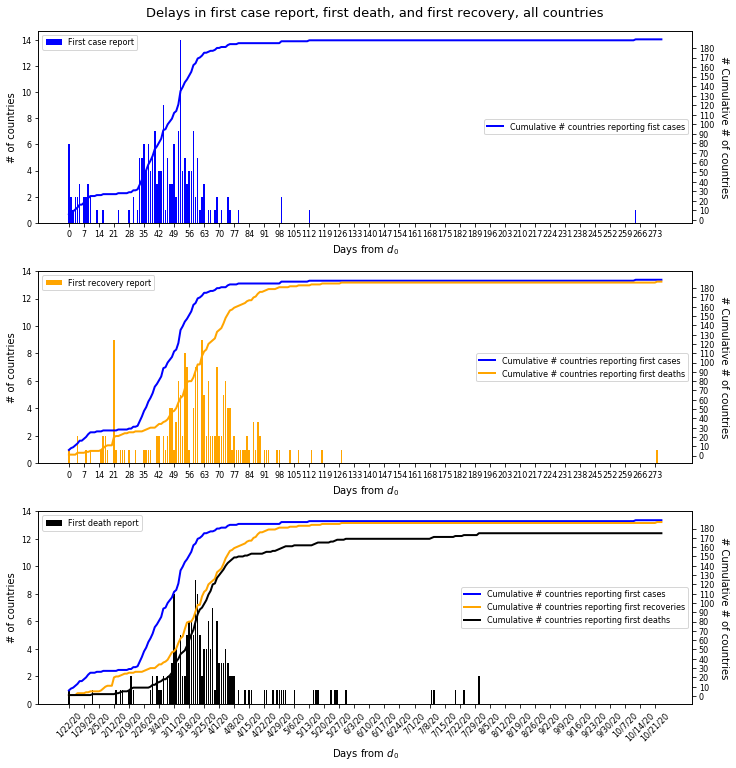

In [151]:
fRepArrivals= plotCaseArrivals()

In [152]:
# As many as countries
print('Country & First case & first recovery & first death \\\\')
print('\hline ')
iKeptCountries=list()
sDelay_1stRC=list()
sDelay_1stDC=list()
for mm in range(nCountries):
    if si1stD[mm]>=0:
        iKeptCountries.append(mm)
        sDelay_1stRC.append(si1stR[mm]-si1stC[mm])
        sDelay_1stDC.append(si1stD[mm]-si1stC[mm])
print(np.array(sDelay_1stRC))
print(sDelay_1stDC)

Country & First case & first recovery & first death \\
\hline 
[ 15   4  16  18   0   4   9  16  19  13  18  17   4  12  17  14  14  17
  13  22  12  12 -11  14  13  12  14   7   6  12  26  13  14  21   5  11
  16  13  17   7  11  17  19   7  19  12  16  17  16  26   8  10  11   4
  19  16  25  22  14  22  17  10  15  20  23  16  11   8  11   6   8   8
  10  10  18  11  12  18  10   8  19  12  15  20  16  11  10  19  15  14
  11   6   9   8  19  13  16  11  13  12  14  11  16   6  14   5  17  21
  12  25  32  21  18   9  13  18  12   8  11  25  22  12  13  20  15  10
   7  23  29  16  12  18  15  19  11   8  15  17  15  19  12  16  16  17
  32  16  24  19   9  26  11  16  45  17  16  21  13  13  27   7  10  25
  13 -67  30  20  19  15  33  18  22  14  19  14  15]
[25, 39, 29, 38, 0, 22, 190, 58, 22, 52, 112, 43, 35, 61, 42, 51, 52, 41, 3, 21, 48, 35, 38, 31, 36, 13, 23, 0, 29, 18, 28, 40, 9, 27, 36, 21, 16, 16, 23, 9, 22, 14, 38, 25, 20, 17, 25, 27, 5, 8, 16, 32, 16, 20, 24, 22, 30, 14

In [210]:
#cFirstCases, binsC = np.histogram(dFC,np.arange(0,(iFD-iFC).max()))
days = np.arange(nDays)

def cumCaseArrivals(figS=(11,13)):
    shift=0.3; W=.7
    fRepArrivals= gr.figure(figsize=figS); 
    gr.ioff(); rows=2; cols=1;
    ticks = np.arange(0,nDays,7)
    ax=list(); tAx=list()
    d1=12; d2=19; d3=16; d4=20; L1=50; L2=140; 
    for m in range(cols*rows):
        ax.append(fRepArrivals.add_subplot(rows,cols,m+1))
    a = np.where(cDailyReports_C>=L1)[0][0]
    b = np.where(cDailyReports_C>=L2)[0][0]
    c = np.where(cDailyReports_R<L1)[0][-1]
    d = np.where(cDailyReports_R<L2)[0][-1]
    e = np.where(cDailyReports_D<L1)[0][-1]
    f = np.where(cDailyReports_D>=L2)[0][0]
    ax[0].plot([days[a],days[c]],[L1,L1],'k-',lw=2, alpha=0.35)
    ax[0].plot([days[b],days[d]],[L2,L2],'k-',lw=2, alpha=0.35)
    ax[0].plot(days,cDailyReports_R,'orange',lw=2,label='Cumulative # countries reporting deaths')
    ax[0].plot(days,cDailyReports_C,'b',lw=2, label='Cumulative # countries reporting cases')
    ax[0].plot(days[d1:],cDailyReports_C[:-d1],'b:',lw=1, alpha=0.5, label=r'$C(t+%d)$'%d1)
    ax[0].plot(days[d2:],cDailyReports_C[:-d2],'b--',lw=1, alpha=0.5, label=r'$C(t+%d)$'%d2)
    ax[1].plot([days[a],days[e]],[L1,L1],'k-',lw=2, alpha=0.35)
    ax[1].plot([days[b],days[f]],[L2,L2],'k-',lw=2, alpha=0.35)
    ax[1].plot(days,cDailyReports_C,'b',lw=2, label='Cumulative # countries reporting cases')
    ax[1].plot(days[d3:],cDailyReports_C[:-d3],'b:',lw=1, alpha=0.5, label=r'$C(t+%d)$'%d3)
    ax[1].plot(days[d4:],cDailyReports_C[:-d4],'b--',lw=1, alpha=0.5, label=r'$C(t+%d)$'%d4)
    ax[1].plot(days,cDailyReports_D,'k',lw=2,label='Cumulative # countries reporting deaths')
    for m in range(cols*rows):
        ax[m].set_xticks(ticks)
        ax[m].set_yticks(np.arange(0,nCountries+1,10))
        ax[m].set_ylabel('# Countries',rotation=90,labelpad=15)
        ax[m].legend(loc='lower right',fontsize=13)
    ax[1].set_xticklabels(dates[ticks],{'fontsize':8,'rotation':45})
    for label in ax[1].get_xticklabels():
        label.set_horizontalalignment('center')
        label.set_horizontaloffset=-15
    for mm in range(rows*cols):
        ax[mm].set_xlabel('Days from $d_0$')
    fRepArrivals.subplots_adjust(left=0.075,bottom=0.1,right=0.9,top=0.95,wspace=0.1,hspace=0.25)
    fRepArrivals.suptitle('Delays in first case report, first death, and first recovery, all countries')
    gr.ion(); gr.draw(); gr.show()
    str1='../figures_COVID19_dataAnalysis/dam_COVID19_JHU_firstDelays_AllCountries_%s.png'%lastDay.date()
    fRepArrivals.savefig(str1)
    return fRepArrivals



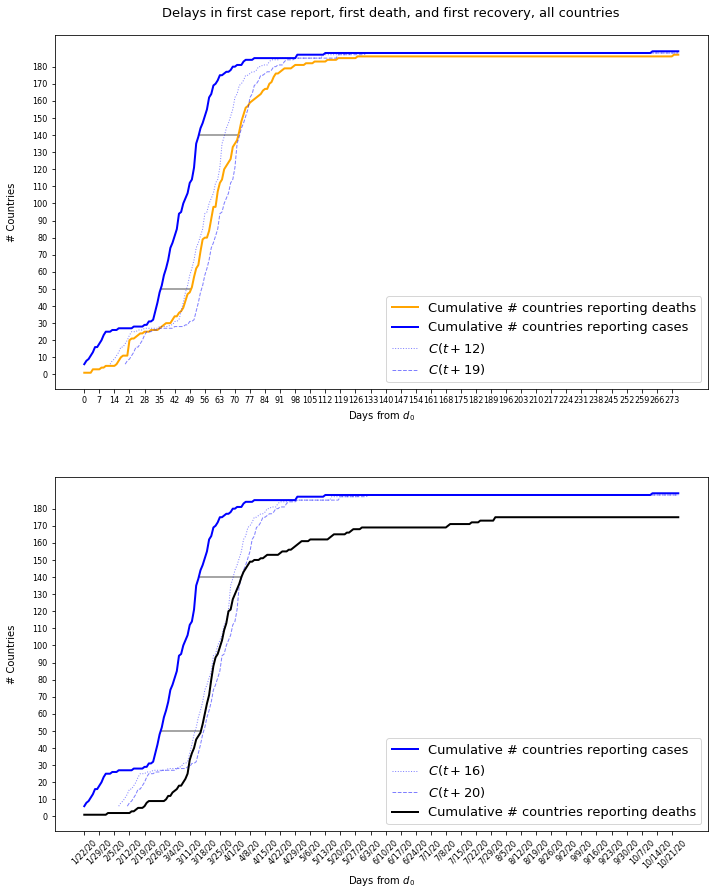

In [211]:
fRepArrivals= cumCaseArrivals(figS=(11,13))

## Prevalence and disease dynamics at the country level

### Simple model of epidemiological dynamics based on macroscopic data

$C(t)$ total confirmed cases, $R(t)$ total recoveries (not always available), $D(t)$ total deaths (not always available)

$\delta$ is the time step in days. 
Absolute prevalence (active cases without normalization by population size)
$$c(t + \delta) = C(t+\delta) - C(t)$$ 
If $\delta =1$, then $c$ represents the daily prevalence (without normalization by population size)







#### Recoveries and deaths 
The new recoveries and deaths can be calculated by substraction
\begin{eqnarray}
r(t+\delta) &=& R(t+\delta) - R(t) \\
d(t+\delta) &=& D(t+\delta) - D(t) 
\end{eqnarray}

Incidence (new cases) ($x$)
$$ x(t) = \frac{c(t+\delta) - c(t)}{\delta} + r(t) + d(t) $$


The proportion of new recoveries and deaths from the existing cases is
$$ \rho = \frac{r(t) + d(t)}{c(t)}$$
The event in which an active case either recovers or dies (gets removed from the active cases) can be assumed to be independent of other cases. 
Then the number of new removals from the case population can be assumed to be a binomial random variable with parameters $c(t)$ and $\rho(t)$, and $\rho(t)\cdot c(t)$ can be assumed to be the expected number of recoveries+deaths. 

The proportion of deaths from the total of deaths and recoveries at time t, $p_d$ can be regarded as the probability that a removal results in death. Similarly, the proportion of recoveries within the removals, $p_r$ can be regarded as the probability that a removal is a recovery.

Explicitly
$$ p_r = \frac{r(t)}{r(t) + d(t)}, \quad p_d = \frac{d(t)}{r(t) + d(t)}.$$

It is worth noticing that the deaths and recoveries occur with a delay with respect to the first date of positivity. 



In [307]:
def plotEpiDynamics(cc = 'Germany'):
    nDays = len(days)
    cCases_norm0=data[cc]['cCases']/data[cc]['cCases'].max()
    cRecov_norm0=data[cc]['cRecov']/data[cc]['cCases'].max()
    cDeath_norm0=data[cc]['cDeath']/data[cc]['cCases'].max()
    pCases =  diff(data[cc]['cCases'])
    # print(cCases_norm0)
    f=gr.figure(figsize=(17,13)); rows=3; cols=1; gr.ioff(); 
    ax=list(); 
    ax.append(f.add_subplot(rows,cols,1))
    ax[0].plot(days,cCases_norm0,lw=2,label=r'$C(t)/\max(C(t))$ Normalized total confirmed cases')
    ax[0].plot(days,cRecov_norm0,label=r'$R(t)/\max(C(t))$, Normalized recoveries')
    ax[0].plot(days,cDeath_norm0,label=r'$D(t)/\max(C(t))$, Normalized total deaths')
    ax.append(f.add_subplot(rows,cols,2))
    ax[1].plot(days,data[cc]['pCases'],lw=3,label=r'(absolute) prevalence')
    ax[1].plot(days,data[cc]['newRecov'],label=r'recoveries')
    ax[1].plot(days,data[cc]['newDeath'], label=r'deaths')
    ax[1].set_ylim(0,data[cc]['pCases'].max())
    ax.append(f.add_subplot(rows,cols,3))
    ax[2].plot(days,data[cc]['cCaseRemovalRatio'],'.',label=r'$\rho(t)$')
    ax[2].plot(days,data[cc]['recovRemovalRatio'],'.',label=r'$p_r(t)$')
    ax[2].plot(days,data[cc]['deathRemovalRatio'],'.',label=r'$p_d(t)$')
    ax[2].set_ylim(0,1)
    #
    ticks = np.arange(0,nDays,7)
    for nn in range(len(ax)):
        ax[nn].legend(fontsize=15)
        ax[nn].set_xticks(ticks)
        ax[nn].set_xticklabels(dates[ticks],{'fontsize':10,'rotation':45})
        for label in ax[nn].get_xticklabels():
            label.set_horizontalalignment('center')
            label.set_horizontaloffset=-15
    gr.ion(); gr.draw(); 
    str1='../figures_COVID19_dataAnalysis/dam_COVID19_JHU_prevalenceDynamics_%s_%s.png'%(cc,lastDay.date())
    fRepArrivals.savefig(str1)
    #meanCFR = data[cc]['deathRemovalRatio'].mean()*100
    #print('Mean case fatality ratio = %g per cent'%(meanCFR))
    return ff,ax

(<Figure size 1224x504 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f18abbc65e0>])

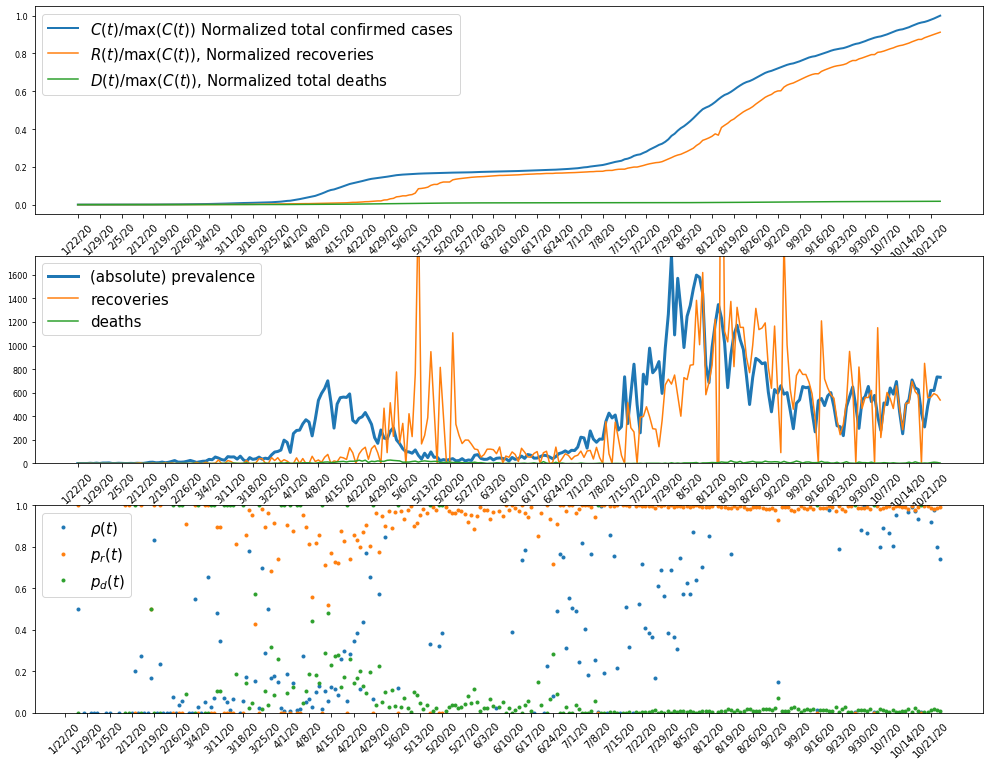

In [308]:
ccc='Japan'
plotEpiDynamics(cc = ccc)

## Case fatality ratios

The case fatality ratio calculation for an ongoing epidemic should be $100\cdot p_d$ [(Estimating mortality during a pandemic, WHO, 2020)](https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19). For that, it is necessary to assume that 

1. The likelihood of detecting cases and deaths is consistent over the course of the outbreak.

2. All detected cases have resolved (that is, reported cases have either recovered or died).

Therefore, the data to take into consideration must be such that the values of the distribution of $p_d$ are relatively stable. 

<ipython-input-306-df1387830a90>:2: RuntimeWarning: invalid value encountered in true_divide
  cfr0 = data[ccc]['cDeath']/(data[ccc]['cDeath']+data[ccc]['cRecov'])
<ipython-input-306-df1387830a90>:3: RuntimeWarning: invalid value encountered in less
  ii = (cfr0<upperLim) & (cfr0>0)
<ipython-input-306-df1387830a90>:3: RuntimeWarning: invalid value encountered in greater
  ii = (cfr0<upperLim) & (cfr0>0)
No handles with labels found to put in legend.


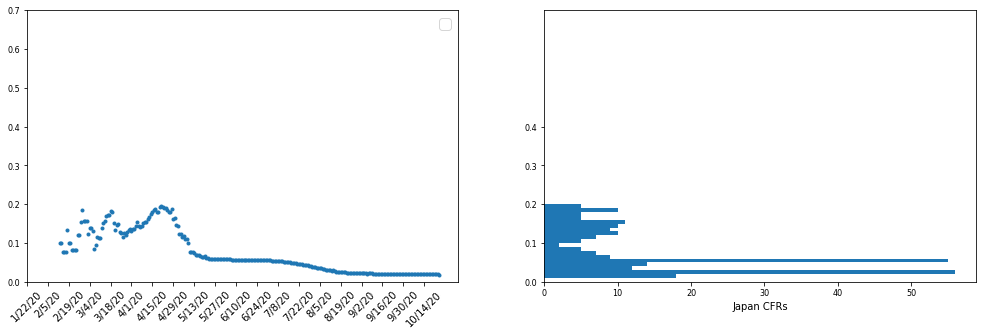

In [306]:
upperLim=0.7
cfr0 = data[ccc]['cDeath']/(data[ccc]['cDeath']+data[ccc]['cRecov'])
ii = (cfr0<upperLim) & (cfr0>0)
cfr = cfr0[ii]
#
fCFR=gr.figure(figsize=(17,5)); gr.ioff()
ax=list(); rows = 1; cols=2;
ax.append(fCFR.add_subplot(rows,cols,1))
ax.append(fCFR.add_subplot(rows,cols,2))
ax[0].plot(days[ii],cfr,'.')
ax[1].hist(cfr,np.arange(0,1,0.01),orientation='horizontal')
ax[1].set_xlabel(ccc+ ' CFRs' );
ax[1].set_yticks(np.arange(0,0.5,0.1))
for i in range(rows*cols):
    ax[i].set_ylim(0,np.maximum(upperLim,cfr.max()))
ticks = np.arange(0,nDays,14)
ax[0].legend(fontsize=15)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(dates[ticks],{'fontsize':10,'rotation':45})
for label in ax[0].get_xticklabels():
    label.set_horizontalalignment('center')
    label.set_horizontaloffset=-15

gr.ion(); gr.draw()

## Deterministic epidemic dynamics by country from the simple model 

For a start, assume that the population of each country is divided into four subsets representing the susceptible, infected, no-longer infected (non-infectious) and no-longer susceptible, and dead due to infection, with densities respectively written as 
$u$, $v$, $r$, and $d$. Assume that $1=u+v+w+x$, and that the dynamics between those groups follow an SIR-like evolution rules given by
\begin{eqnarray}
\partial_t u &=& -\lambda u ,\\
\partial_t v &=& \lambda u - v \left( \frac{p_r}{\tau_r} +\frac{1-p_r}{\tau_d} \right) ,\\
\partial_t r &=& v\frac{p_r}{\tau_r}, \\
\partial_t d &=& v\frac{1-p_r}{\tau_d},
\end{eqnarray}
with $\tau_r$ and $\tau_d$ representing the average times to clear the infection and, alternatively, the expected time to death due to disease. Although these two times could differ depending on a number of factors including the health care capacities in different countries, they may not be very different between different countries.  It is not unreasonable to assume that is the case to construct an initial model that describes the macroscopic dynamics of the COVID-19 epidemics at the whole country level.   Note the desinfection rate and death rate are $p_r/\tau_r$ and $(1-p_r)/\tau_x$ respectively, with $p_r$ representing the proportion of recoveries among removals. 




In [269]:
def plotDynamicsPP(cc,figS=(15,7)):
    ff= gr.figure(figsize=figS)
    rows=1; cols=2; gr.ioff()
    ff.suptitle(cc)
    ax=list()
    for i in range(rows*cols):
        ax.append(ff.add_subplot(rows,cols,i+1))
              
    ax[0].plot(data[cc]['pCases'],'k',alpha=0.35, ms=2, label=r'Cases')
    ax[0].plot(data[cc]['newCases'],'.',ms=5,label=r'New cases')
    ax[0].plot(data[cc]['newRecov'],'.',label=r'recoveries')
    ax[0].plot(data[cc]['newDeath'],'.',label=r'deaths')
    ax[0].set_ylim(-1,data[cc]['newCases'].max())
    ax[0].set_ylabel('# People')
    ax[1].plot(data[cc]['pCases'], data[cc]['newCases'],'.',ms=5,label=r'New cases')
    ax[1].plot(data[cc]['pCases'], data[cc]['newRecov'],'.',label=r'recoveries')
    ax[1].plot(data[cc]['pCases'], data[cc]['newDeath'],'.',label=r'deaths')
    ax[1].set_ylim(-1,data[cc]['newCases'].max())
    ax[1].set_xlabel('Cases')
    ax[1].set_ylabel('New cases')
    for i in range(rows*cols):
        ax[i].legend(fontsize=15)
    return ff,ax

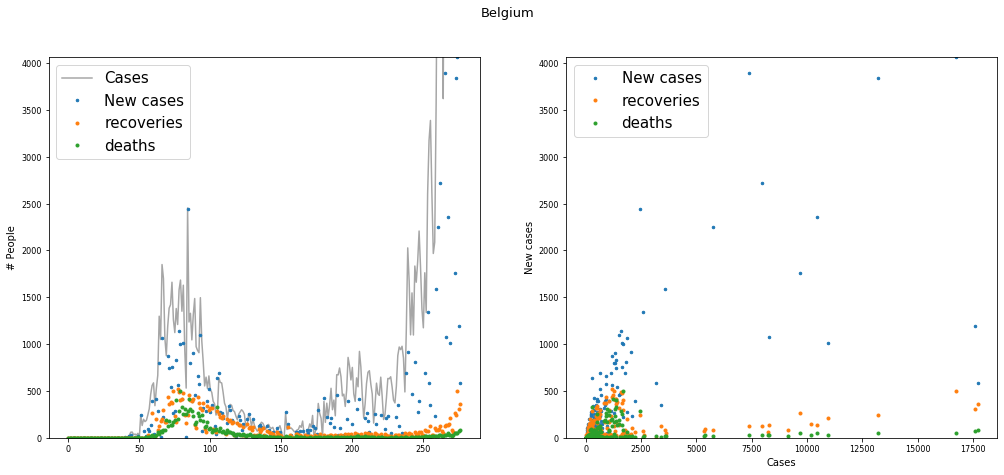

In [270]:
ff,ax= plotDynamicsPP(cc = 'Belgium',figS=(17,7))


The _force of infection_ in the model is given by $\lambda = \epsilon \alpha v$ where $\alpha$ is the rate of infection given an infectious contact, and $\epsilon$ is an exposure factor that scales the number of contacts between susceptibles and infected individuals. 
As a consequence, it is possible to analyze the macroscopic dynamics with two equations in mind,
\begin{eqnarray}
\partial_t v &=& v \left[\alpha \epsilon \left(1-w-x-v\right)- \left(\frac{p}{\tau_w} +\frac{1-p}{\tau_x}\right) \right]  ,\\
\partial_t (w+x) &=& v \left( \frac{p}{\tau_w} +\frac{1-p}{\tau_x} \right).
\end{eqnarray}
From there, the condition for epidemic dynamics is that 
$$
R(t)=\frac{\alpha \epsilon}{\left( \frac{p}{\tau_w} +\frac{1-p}{\tau_x} \right)} (1-w(t)-x(t)-v(t))> 1.  
$$
As a consequence, 
$$R_o \approx \frac{\alpha \epsilon}{\frac{p}{\tau_w} +\frac{1-p}{\tau_x}}$$




Data from different countries suggest that on average, a person spends between 5 and 7 days in a stage that can be assumed to be primary viremia, only allowing virus replication, but infectious since the first hours after contagion. Then some people develop the disease, 50% (IQR) of which do so between 5 and 11 days. Importantly, people can be regarded as infectious from the day they are in first contact with SARS-CoV-2 \citep{}, and remain infectious until after clinical recovery.  From there, people who have been tested positive for SARS-CoV-2 with RT-PCR testing have been reported to remain infectious between 15 and 21 more days, depending on whether they recover or whether they die. This means that the __waiting time for people that recover from having COVID-19 can remain infectious approximately between 20 and 22 days__. Similarly, __people that die due to COVID-19 may remain infected between 26 and 28 days__. At the time this report is written, _there have been some reports claiming that people who have been tested positive for COVID-19 may still be positive for SARS-CoV-2 tests up to 160 days after the first time they tested positive_. However, that evidence is not conclusive yet.

According to data published before or on May 25, 2020, _the waiting times for removal from the infectious group can be assumed to be aproximately 20 days for $\tau_w$ and 25 days for $\tau_x$_. 
The __initial estimates for $R_o$ in different countries fluctuated between 2 and 4__. A crude estimate for the product of the exposure factor and the infection rate given an infectious contact, can be obtained by using the estimates for $R_o$. First, assume that at the time of the outbreak, $1-v-w-x \approx 1$. Therefore, $$\frac{p}{\tau_w} +\frac{1-p}{\tau_x} =\frac{p}{20} +\frac{1-p}{25} = \frac{25(1-p) + 20p}{500}$$ and
$$
\alpha \epsilon = R_o \left( \frac{p_r}{\tau_r} +\frac{1-p_r}{\tau_d} \right) = \left(\frac{25(1-p) + 20p}{500}\right)R_o  
$$
A static, conservative estimate can be obtained assuming that the case fatality ratio is similar to $p_d = 1-p_r$, which is between 0.005 and 0.0158 [(Health Metrix)](www.healthdata.org). 

The data available for most countries is separated in three cumulative time series, respectively, the total cases ($C$), recoveries ($R$), and deaths ($D$), sampled every day. After normalization by the population size $T$, recoveries and deaths can be thought of as similar in behavior to $w+x$. The prevalence of the disease cannot be known. However, if testing is done in a way that the sampling is representative of the overall dynamics, an approximation with a similar behaviour to the prevalence can be obtained from the the data of confirmed cases is then
$$
\tilde{P}(t)=\frac{C(t) - \left( R(t) + D(t) \right)}{T}
$$
which means that the dynamics of $v(t)$ can be fit to the dynamics of $\tilde{P}$, in an attempt to study the qualitative features of the epidemic. The possible undersampling due to incomplete testing can then be accounted non explicitly by $\epsilon$. 
Then, from the data, it is also possible to estimate the incidence and the rates. The change in the deaths per unit time could be assumed to be $$\partial_t x(t+h) \approx D(t+h) - D(t).$$ Similarly for the change in the recoveries $$\partial_t w(t+h) \approx R(t+h) -R(t).$$ 
The death rate can be estimated by using the equation
$$
\frac{1-p}{\tau_x} \approx \frac{\partial_t x}{v} 
$$
The desinfection rate can be obtained in a similar way
$$
\frac{p}{\tau_w} \approx \frac{\partial_t w}{v} 
$$



In [139]:
# create a new plot with a title and axis labels
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')
cc = 'Canada'
# add a line renderer with legend and line thickness
p.line(days,data[cc]['cCases'], legend_label="Cases ", line_width=2,line_color='blue')
p.line(days,data[cc]['cRecov'], legend_label="Recoveries", line_width=2,line_color='green')
p.line(days,data[cc]['cDeath'], legend_label="Deaths", line_width=2,line_color='red')
p.line(days,data[cc]['pCases'], legend_label="prevalence", line_width=2,line_color='black')
# show the results
show(p)

Loading BokehJS ...